### Generic Machine Learning Pipeline Outline¶
1. Load the Dataset
Import necessary libraries
Read the dataset from a local file or an online source
Display basic dataset information (head(), describe(), info())

In [2]:
!pip install streamlit
# Data Handling and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


# Machine Learning (Preprocessing & Model Training)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Saving & Loading Model
import pickle 

In [3]:
import sklearn
print(sklearn.__version__)

1.6.1


In [4]:
import pandas
print(pandas.__version__)

2.1.4


In [5]:
import numpy
print(numpy.__version__)

1.26.4


In [6]:
import seaborn
print(seaborn.__version__)

0.12.2


In [7]:
df = pd.read_csv("stroke_data.csv")

In [8]:
df.head(5)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [90]:
df.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
df.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555162,51.327255,0.213835,0.127719,0.821340,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,0.496954,21.623969,0.410017,0.333781,0.383072,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [12]:
df.columns

Index(['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [13]:
#fiiling missing values with mode 
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

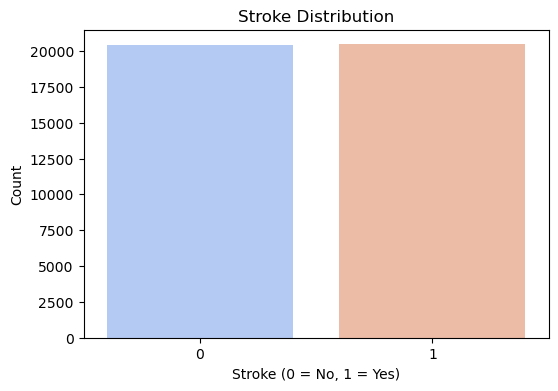

In [14]:
#Class Distribution (Stroke vs. No Stroke), Does the dataset have more 0s (no stroke) than 1s (stroke)?
plt.figure(figsize=(6,4))
sns.countplot(x='stroke', data=df, palette='coolwarm')
plt.title("Stroke Distribution")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

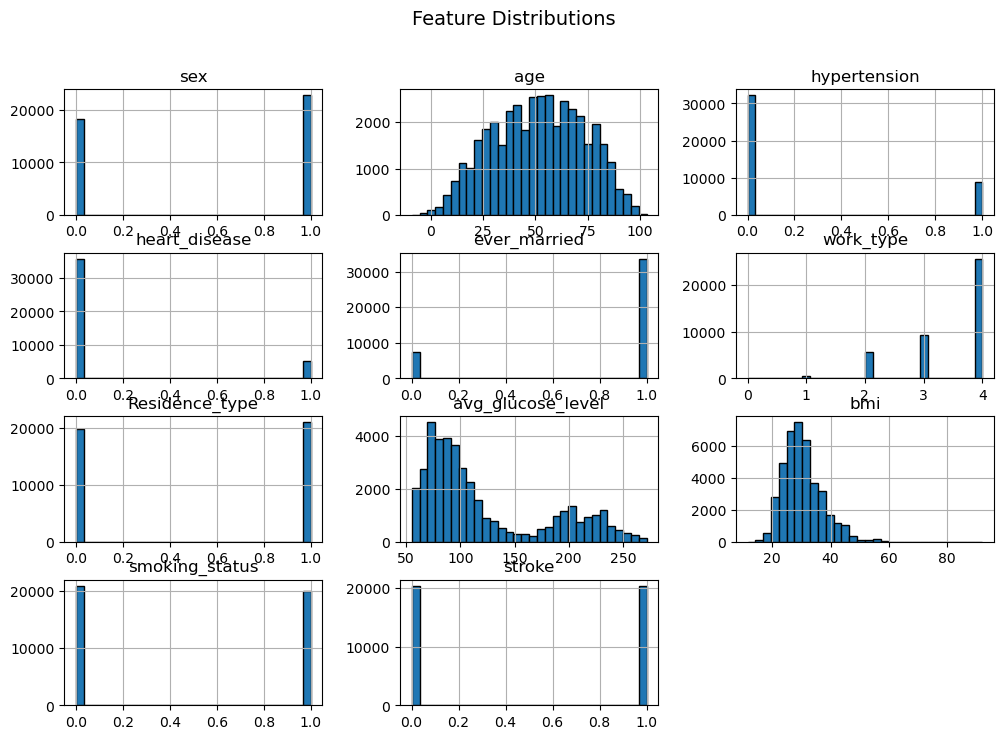

In [15]:
#Distribution of Numerical Features, Check how age, glucose levels, BMI, etc., are distributed.
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

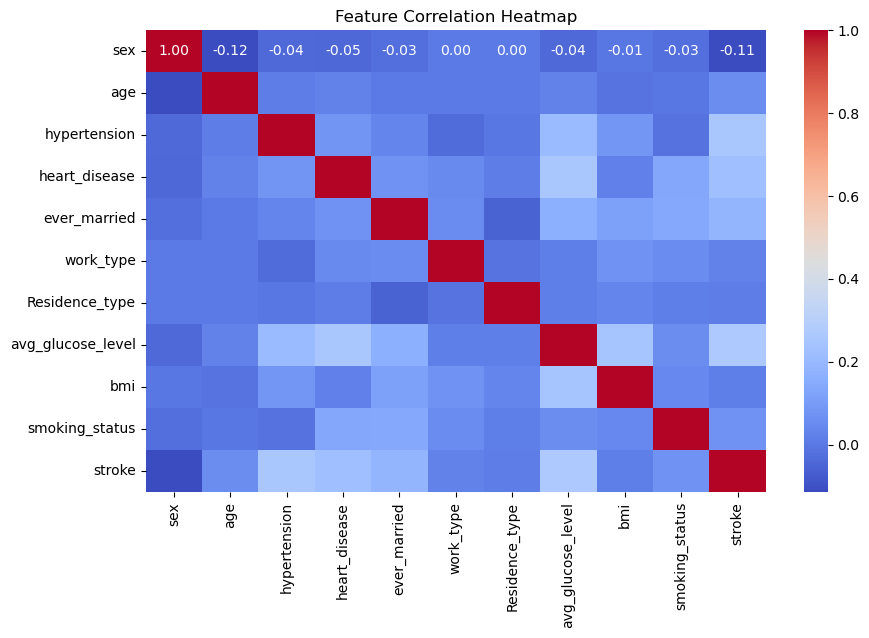

In [16]:
#Correlation Heatmap, Which features are highly related to stroke risk?
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

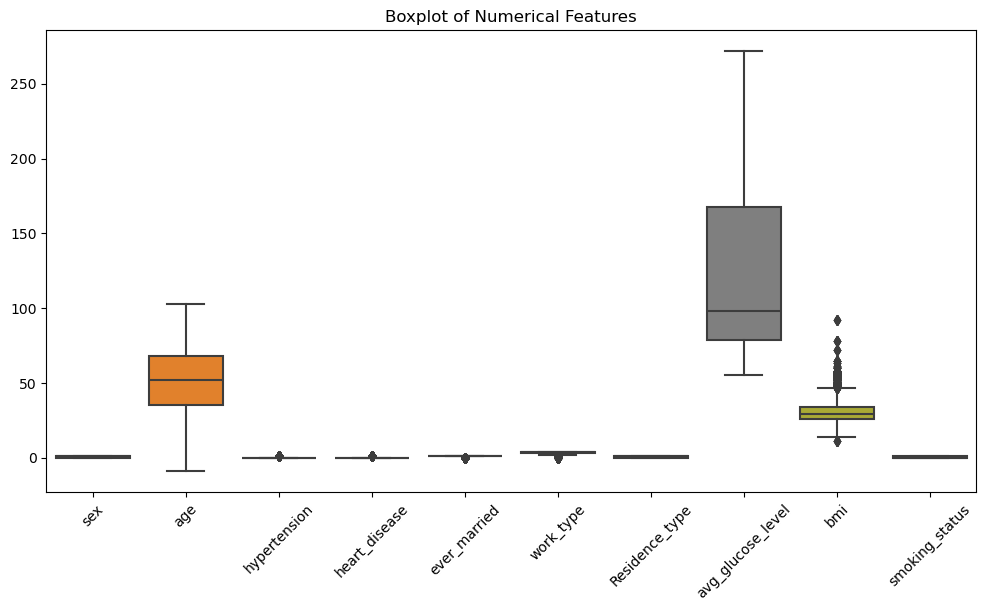

In [17]:
#Boxplots to Detect Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=['stroke']))
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()

C:\Users\NCC\AppData\Local\Temp\ipykernel_14008\1311039033.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['stroke'] == 1]['age'], label="Stroke", shade=True, color='red')
C:\Users\NCC\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\NCC\AppData\Local\Temp\ipykernel_14008\1311039033.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['stroke'] == 0]['age'], label="No Stroke", shade=True, color='blue')
C:\Users\NCC\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as

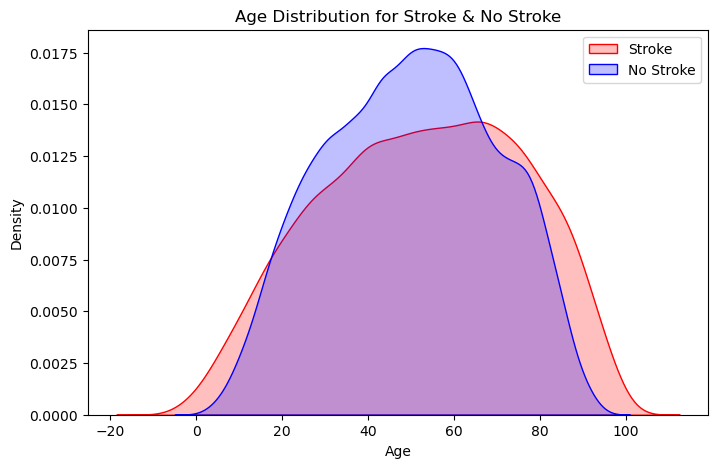

In [18]:
# Step 7: Age vs. Stroke Relationship
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df['stroke'] == 1]['age'], label="Stroke", shade=True, color='red')
sns.kdeplot(df[df['stroke'] == 0]['age'], label="No Stroke", shade=True, color='blue')
plt.title("Age Distribution for Stroke & No Stroke")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

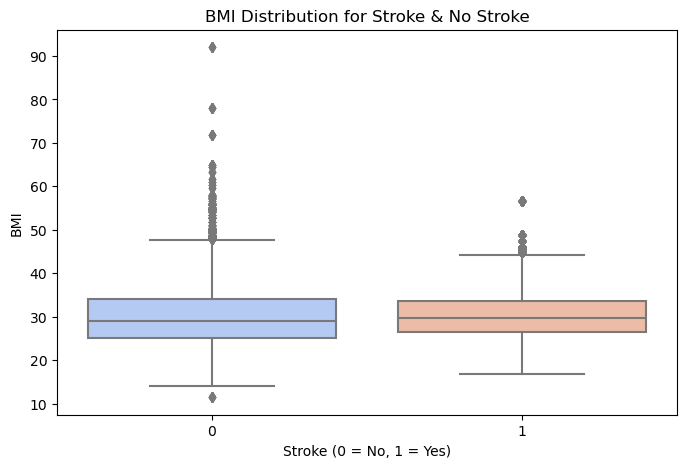

In [19]:
# Step 8: BMI vs. Stroke Risk
plt.figure(figsize=(8, 5))
sns.boxplot(x='stroke', y='bmi', data=df, palette='coolwarm')
plt.title("BMI Distribution for Stroke & No Stroke")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("BMI")
plt.show()

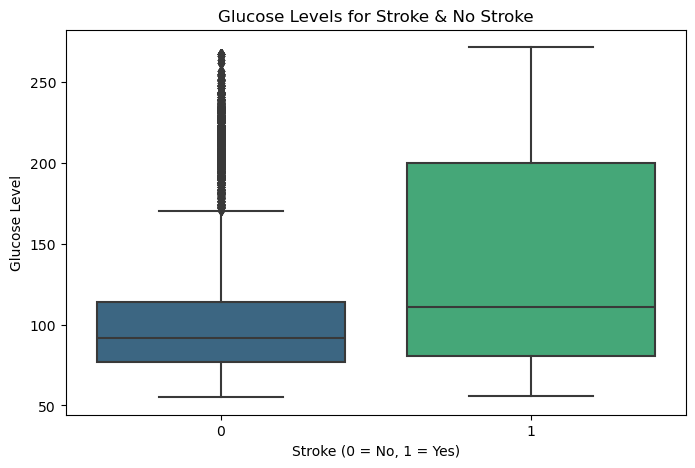

In [20]:
# Step 9: Glucose Levels & Stroke Risk
plt.figure(figsize=(8, 5))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette='viridis')
plt.title("Glucose Levels for Stroke & No Stroke")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Glucose Level")
plt.show()

In [21]:
df1= df['sex']

In [22]:
df1

0        1.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
40905    1.0
40906    0.0
40907    1.0
40908    1.0
40909    1.0
Name: sex, Length: 40910, dtype: float64

In [23]:
# Step 4: Define Features (X) and Target (y)
X = df.drop(columns=['stroke'])  # Features (all columns except 'stroke')
Y = df['stroke']  # Target variable

In [24]:
X

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
40905,1.0,38.0,0,0,0,4,1,120.94,29.7,1
40906,0.0,53.0,0,0,1,4,0,77.66,40.8,0
40907,1.0,32.0,0,0,1,2,0,231.95,33.2,0
40908,1.0,42.0,0,0,1,3,0,216.38,34.5,0


In [25]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
40905    0
40906    0
40907    0
40908    0
40909    0
Name: stroke, Length: 40910, dtype: int64

In [26]:
Y=LabelEncoder().fit_transform(Y)

In [27]:
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=82)


In [29]:
X_train

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
27474,0.0,66.0,0,0,1,4,1,113.01,37.6,0
34963,1.0,33.0,0,0,0,2,1,60.36,24.1,0
6847,0.0,30.0,0,0,1,4,1,64.44,45.0,0
29152,0.0,91.0,0,0,0,1,1,116.25,16.4,1
10333,0.0,6.0,1,0,1,3,0,74.02,25.0,0
...,...,...,...,...,...,...,...,...,...,...
38510,1.0,51.0,0,0,0,4,1,68.40,37.5,0
19805,0.0,98.0,0,1,1,2,0,103.68,25.0,0
31131,1.0,58.0,0,0,1,4,0,146.61,39.6,0
4546,0.0,52.0,0,0,1,4,1,171.23,34.4,1


### Model selection

In [31]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

### Model Evaluation

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_pred_class = np.round(y_pred).astype(int)

In [35]:
y_pred 

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [36]:
y_pred_class

array([1, 1, 0, ..., 1, 0, 1])

## MSE
## R2-SCORE
## ACCURACY

In [38]:
print ("Mean_Square_ERROR", mean_squared_error(y_pred, Y_test))
print ("R2-SCORE", r2_score(y_pred, Y_test))
print ("ACCURACY", accuracy_score(y_pred_class, Y_test))

Mean_Square_ERROR 0.0017925527580868574
R2-SCORE 0.9928292233568146
ACCURACY 0.9982074472419131


### Saving model

In [40]:
with open ("stroke_model.pkl", "wb") as file:
    pickle.dump(model, file)

In [41]:
with open ("stroke_model.pkl", "rb") as file:
    loaded_model= pickle.load(file)

In [42]:
sample= np.array([[1.0, 63.0, 0, 1, 1, 4, 1, 228.69, 36.6, 1]])
prediction = loaded_model.predict(sample)

C:\Users\NCC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [43]:
prediction

array([1], dtype=int64)

In [44]:
!pip install -U scikit-learn


   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB 640.0 kB/s eta 0:00:14
   ---------------------------------------- 0.0/8.9 MB 640.0 kB/s eta 0:00:14
   ---------------------------------------- 0.0/8.9 MB 640.0 kB/s eta 0:00:14
   ---------------------------------------- 0.1/8.9 MB 326.1 kB/s eta 0:00:28
   ---------------------------------------- 0.1/8.9 MB 435.7 kB/s eta 0:00:21
   ---------------------------------------- 0.1/8.9 MB 435.7 kB/s eta 0:00:21
    --------------------------------------- 0.2/8.9 MB 523.5 kB/s eta 0:00:17
   - -------------------------------------- 0.2/8.9 MB 625.1 kB/s eta 0:00:14
   - -------------------------------------- 0.3/8.9 MB 603.8 kB/s eta 0:00:15
   - -------------------------------------- 0.3/8.9 MB 748.1 kB/s eta 0:00:12
   - -------------------------------------- 0.4/8.9 MB 917.0 kB/s eta 0:00:10
   -- ------------------------------------- 0.6/8.9 MB 1.0 MB/s eta 0:00:

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.
